# Задание

Разработать автоматический критерий, определяющий применимость к каждому из пользователей паттерна перемещения “работа-дом”, т.е. критерий должен найти тех, кто достаточно долгое время в ночные часы находится в районе одной точки (“дом”) и достаточно долгое время в дневные часы находится в заметно отличающейся точке (“работа”).

Также нужно предоставить результат работы критерия на предоставленной выборке.

Если для решения задачи вы рассматривали несколько алгоритмов и выбрали один из них, будет хорошо, если вы сможете обосновать свой выбор.

### Решение

Можно взять все координаты передвижений пользователя за определенный период времени (ночной или дневной), вместить их в прямоугольник, стороны которого будут лежать на крайних точках передвижения пользователя и посчитать его площадь. Чем меньше площадь, тем больше вероятность того, что пользователь находится дома или на работе.

![](img/image01.png)

Периоды времени выбраны следующие:

    1)	С 02:00 до 04:30 – в это время пользователи должны спать: и кто поздно ложиться спать, и кто рано встает.
    2)	С 11:00 до 16:30, исключая обеденное время с 12:30 до 14:30, – это рабочее время.


Датасет необходимо отредактировать.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('event_sample.csv', sep=';', header=None)
data.columns = ['id', 'time', 'longitude', 'latitude']
data

,id,time,longitude,latitude
0,2,2017-03-20 00:00:18 +0300,38.937878,47.210758
1,3,2017-03-20 00:00:18 +0300,45.655278,43.259605
2,4,2017-03-20 00:00:18 +0300,47.113440,42.804970
3,5,2017-03-20 00:00:18 +0300,158.601667,53.068436
4,6,2017-03-20 00:00:18 +0300,104.259995,52.250453
...,...,...,...,...
1727035,685,2017-03-21 00:00:00 +0300,30.486057,59.942234
1727036,527,2017-03-21 00:00:00 +0300,37.872987,55.912129
1727037,805,2017-03-21 00:00:00 +0300,45.869799,43.289353
1727038,824,2017-03-21 00:00:00 +0300,44.790299,43.215624


In [3]:
data.isnull().sum()

id           0
time         0
longitude    0
latitude     0
dtype: int64

Проверяем какие данные 2017-03-21. 

In [4]:
data[(data.time >= '2017-03-21 00:00:00') & (data.time < '2017-03-21 05:00:00')]

,id,time,longitude,latitude
1727016,2,2017-03-21 00:00:00 +0300,38.938873,47.208850
1727017,644,2017-03-21 00:00:00 +0300,45.660279,43.346958
1727018,74,2017-03-21 00:00:00 +0300,40.369995,56.153555
1727019,733,2017-03-21 00:00:00 +0300,39.811614,47.236863
1727020,922,2017-03-21 00:00:00 +0300,45.612848,43.144869
1727021,685,2017-03-21 00:00:00 +0300,30.476095,59.946700
1727022,81,2017-03-21 00:00:00 +0300,30.348278,60.034394
1727023,767,2017-03-21 00:00:00 +0300,39.742325,47.140055
1727024,418,2017-03-21 00:00:00 +0300,44.756051,43.208011
1727026,625,2017-03-21 00:00:00 +0300,41.962677,45.039569


Данные за 21-03 можно не использовать.

Делаем срез данных за ночной период, в это время пользователь должен спать.

In [5]:
data_sorted_night = data[(data.time > '2017-03-20 02:00:00') & (data.time < '2017-03-20 04:30:00')]
data_sorted_night

,id,time,longitude,latitude
275943,623,2017-03-20 02:00:00 +0300,40.041923,47.423152
275945,296,2017-03-20 02:00:00 +0300,44.929010,53.224565
275946,837,2017-03-20 02:00:00 +0300,44.063807,56.354717
275948,795,2017-03-20 02:00:00 +0300,39.784373,47.248708
275949,869,2017-03-20 02:00:00 +0300,44.780681,43.213411
...,...,...,...,...
548525,897,2017-03-20 04:29:47 +0300,39.897918,47.803528
548547,885,2017-03-20 04:29:59 +0300,39.191554,51.628404
548575,476,2017-03-20 04:29:55 +0300,50.828838,54.423747
548612,646,2017-03-20 04:29:58 +0300,45.916561,43.160975


Сортируем данные по id и time.

In [6]:
data_sorted_night = data_sorted_night.sort_values(by=['id', 'time'], ascending=[True, True])
data_sorted_night

,id,time,longitude,latitude
281059,2,2017-03-20 02:02:23 +0300,38.938487,47.210089
285194,2,2017-03-20 02:04:20 +0300,38.938835,47.209228
285200,2,2017-03-20 02:04:20 +0300,38.938016,47.210160
285989,2,2017-03-20 02:04:42 +0300,38.938352,47.210668
286003,2,2017-03-20 02:04:43 +0300,38.931705,47.208533
...,...,...,...,...
333794,956,2017-03-20 02:27:27 +0300,37.716429,55.823002
281617,957,2017-03-20 02:02:40 +0300,37.904354,55.584204
281642,957,2017-03-20 02:02:41 +0300,37.904363,55.585628
522594,958,2017-03-20 04:13:53 +0300,30.377921,59.830188


Группируем данные по пользователю и вытаскиваем информацию по минимуму и максимуму широты и долготы, а также вычисляем координаты центроида района передвижений.

In [7]:
data_sorted_night_minmax = data_sorted_night.drop(['time'], axis=1).groupby('id').agg(['min', 'max'])
data_sorted_night_longlat = data_sorted_night.drop(['time'], axis=1).groupby('id').agg({'longitude': 'mean', 'latitude': 'mean'})
data_sorted_night_count = data_sorted_night_minmax.merge(data_sorted_night_longlat, on='id', how='inner')
data_sorted_night_count

,"(longitude, min)","(longitude, max)","(latitude, min)","(latitude, max)",longitude,latitude
id,,,,,,
2,38.930181,38.940334,47.207178,47.210771,38.938396,47.209695
3,45.655168,45.657163,43.258589,43.260574,45.656193,43.259608
4,47.110042,47.131629,42.805473,42.822272,47.122996,42.813180
5,158.597147,158.614960,53.067354,53.077955,158.603659,53.069024
6,104.249767,104.300663,52.222479,52.258603,104.256066,52.252100
...,...,...,...,...,...,...
954,103.907036,104.156459,52.382810,52.546474,104.084433,52.417183
956,37.716429,37.717582,55.822089,55.823002,37.717083,55.822434
957,37.904354,37.904363,55.584204,55.585628,37.904358,55.584916


In [8]:
data_sorted_night_count.columns = ['longitude_min', 'longitude_max', 'latitude_min', 
                                   'latitude_max', 'longitude_mean', 'latitude_mean']
data_sorted_night_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean,latitude_mean
id,,,,,,
2,38.930181,38.940334,47.207178,47.210771,38.938396,47.209695
3,45.655168,45.657163,43.258589,43.260574,45.656193,43.259608
4,47.110042,47.131629,42.805473,42.822272,47.122996,42.813180
5,158.597147,158.614960,53.067354,53.077955,158.603659,53.069024
6,104.249767,104.300663,52.222479,52.258603,104.256066,52.252100
...,...,...,...,...,...,...
954,103.907036,104.156459,52.382810,52.546474,104.084433,52.417183
956,37.716429,37.717582,55.822089,55.823002,37.717083,55.822434
957,37.904354,37.904363,55.584204,55.585628,37.904358,55.584916


Вычисляем одну сторону прямоугольника по минимуму и максимуму долготы. Координату широты берем центроида.

In [9]:
from geopy.distance import geodesic

In [10]:
# Объявляем функцию для вычисления стороны прямоугольника

def distanse_longitude(row):
    origin = (row['latitude_mean'], row['longitude_min'])
    dist = (row['latitude_mean'], row['longitude_max'])
    return geodesic(origin, dist).meters


In [11]:
# Применяем функцию к датафрему

data_sorted_night_count['distanse_long'] = data_sorted_night_count.apply(distanse_longitude, axis=1)
data_sorted_night_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean,latitude_mean,distanse_long
id,,,,,,,
2,38.930181,38.940334,47.207178,47.210771,38.938396,47.209695,769.147939
3,45.655168,45.657163,43.258589,43.260574,45.656193,43.259608,162.011144
4,47.110042,47.131629,42.805473,42.822272,47.122996,42.813180,1765.498163
5,158.597147,158.614960,53.067354,53.077955,158.603659,53.069024,1193.997233
6,104.249767,104.300663,52.222479,52.258603,104.256066,52.252100,3475.779823
...,...,...,...,...,...,...,...
954,103.907036,104.156459,52.382810,52.546474,104.084433,52.417183,16970.201087
956,37.716429,37.717582,55.822089,55.823002,37.717083,55.822434,72.244260
957,37.904354,37.904363,55.584204,55.585628,37.904358,55.584916,0.557392


Аналогично вычисляем вторую сторону прямоугольника по минимуму и максимуму широты. Координату долготы берем центроида.

In [12]:
def distanse_latitude(row):
    origin = (row['latitude_min'], row['longitude_mean'])
    dist = (row['latitude_max'], row['longitude_mean'])
    return geodesic(origin, dist).meters

In [13]:
data_sorted_night_count['distanse_lat'] = data_sorted_night_count.apply(distanse_latitude, axis=1)
data_sorted_night_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean,latitude_mean,distanse_long,distanse_lat
id,,,,,,,,
2,38.930181,38.940334,47.207178,47.210771,38.938396,47.209695,769.147939,399.446012
3,45.655168,45.657163,43.258589,43.260574,45.656193,43.259608,162.011144,220.512635
4,47.110042,47.131629,42.805473,42.822272,47.122996,42.813180,1765.498163,1866.211454
5,158.597147,158.614960,53.067354,53.077955,158.603659,53.069024,1193.997233,1179.673204
6,104.249767,104.300663,52.222479,52.258603,104.256066,52.252100,3475.779823,4019.678962
...,...,...,...,...,...,...,...,...
954,103.907036,104.156459,52.382810,52.546474,104.084433,52.417183,16970.201087,18211.885474
956,37.716429,37.717582,55.822089,55.823002,37.717083,55.822434,72.244260,101.593416
957,37.904354,37.904363,55.584204,55.585628,37.904358,55.584916,0.557392,158.504158


Вычисляем площадь прямоугольника по полученным сторонам.

In [14]:
data_sorted_night_count['night_square'] = data_sorted_night_count['distanse_long'] * data_sorted_night_count['distanse_lat']
data_sorted_night_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean,latitude_mean,distanse_long,distanse_lat,night_square
id,,,,,,,,,
2,38.930181,38.940334,47.207178,47.210771,38.938396,47.209695,769.147939,399.446012,3.072331e+05
3,45.655168,45.657163,43.258589,43.260574,45.656193,43.259608,162.011144,220.512635,3.572550e+04
4,47.110042,47.131629,42.805473,42.822272,47.122996,42.813180,1765.498163,1866.211454,3.294793e+06
5,158.597147,158.614960,53.067354,53.077955,158.603659,53.069024,1193.997233,1179.673204,1.408527e+06
6,104.249767,104.300663,52.222479,52.258603,104.256066,52.252100,3475.779823,4019.678962,1.397152e+07
...,...,...,...,...,...,...,...,...,...
954,103.907036,104.156459,52.382810,52.546474,104.084433,52.417183,16970.201087,18211.885474,3.090594e+08
956,37.716429,37.717582,55.822089,55.823002,37.717083,55.822434,72.244260,101.593416,7.339541e+03
957,37.904354,37.904363,55.584204,55.585628,37.904358,55.584916,0.557392,158.504158,8.834900e+01


In [15]:
pd.options.display.float_format ='{:,.6f}'.format

In [16]:
data_sorted_night_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean,latitude_mean,distanse_long,distanse_lat,night_square
id,,,,,,,,,
2,38.930181,38.940334,47.207178,47.210771,38.938396,47.209695,769.147939,399.446012,"307,233.076694"
3,45.655168,45.657163,43.258589,43.260574,45.656193,43.259608,162.011144,220.512635,"35,725.504293"
4,47.110042,47.131629,42.805473,42.822272,47.122996,42.813180,"1,765.498163","1,866.211454","3,294,792.893532"
5,158.597147,158.614960,53.067354,53.077955,158.603659,53.069024,"1,193.997233","1,179.673204","1,408,526.542043"
6,104.249767,104.300663,52.222479,52.258603,104.256066,52.252100,"3,475.779823","4,019.678962","13,971,519.031692"
...,...,...,...,...,...,...,...,...,...
954,103.907036,104.156459,52.382810,52.546474,104.084433,52.417183,"16,970.201087","18,211.885474","309,059,358.674445"
956,37.716429,37.717582,55.822089,55.823002,37.717083,55.822434,72.244260,101.593416,"7,339.541215"
957,37.904354,37.904363,55.584204,55.585628,37.904358,55.584916,0.557392,158.504158,88.348998


Убираем признаки, которые нам уже не понадобятся.

In [17]:
data_sorted_night_count_drop = data_sorted_night_count[['longitude_mean', 'latitude_mean', 'night_square']]
data_sorted_night_count_drop

,longitude_mean,latitude_mean,night_square
id,,,
2,38.938396,47.209695,"307,233.076694"
3,45.656193,43.259608,"35,725.504293"
4,47.122996,42.813180,"3,294,792.893532"
5,158.603659,53.069024,"1,408,526.542043"
6,104.256066,52.252100,"13,971,519.031692"
...,...,...,...
954,104.084433,52.417183,"309,059,358.674445"
956,37.717083,55.822434,"7,339.541215"
957,37.904358,55.584916,88.348998


Смотрим как распределены данные.

<AxesSubplot:>

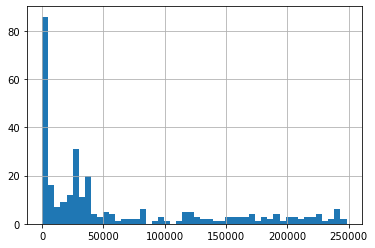

In [18]:
for_hist = data_sorted_night_count[data_sorted_night_count['night_square']< 250000]
for_hist['night_square'].hist(bins=50)

Аналогично подготовим дневной датасет.

In [19]:
data_sorted_day = data[(data.time > '2017-03-20 11:00:00') & (data.time < '2017-03-20 16:30:00')]
data_sorted_day = data_sorted_day[(data_sorted_day.time < '2017-03-20 12:30:00') | (data_sorted_day.time > '2017-03-20 14:30:00')]
data_sorted_day

,id,time,longitude,latitude
1013317,765,2017-03-20 11:00:00 +0300,38.907052,47.417918
1013318,884,2017-03-20 11:00:00 +0300,44.824508,43.194641
1013319,661,2017-03-20 11:00:00 +0300,45.717815,43.292134
1013320,477,2017-03-20 11:00:00 +0300,37.532483,56.395694
1013321,638,2017-03-20 11:00:00 +0300,45.882496,43.277956
...,...,...,...,...
1265769,280,2017-03-20 16:29:59 +0300,131.891321,43.131904
1265773,855,2017-03-20 16:29:59 +0300,45.672925,43.332369
1265831,81,2017-03-20 16:29:52 +0300,30.347323,60.034112
1265836,186,2017-03-20 16:29:55 +0300,131.887877,43.124967


In [20]:
data_sorted_day = data_sorted_day.sort_values(by=['id', 'time'], ascending=[True, True])
data_sorted_day

,id,time,longitude,latitude
1014616,2,2017-03-20 11:01:44 +0300,38.939348,47.209453
1014887,2,2017-03-20 11:02:07 +0300,38.939655,47.210397
1018269,2,2017-03-20 11:06:27 +0300,38.937825,47.209897
1018270,2,2017-03-20 11:06:27 +0300,38.939115,47.209886
1018499,2,2017-03-20 11:06:34 +0300,38.938539,47.210216
...,...,...,...,...
1196662,974,2017-03-20 15:05:55 +0300,37.464388,56.015692
1212440,974,2017-03-20 15:25:33 +0300,37.477887,56.018844
1253536,974,2017-03-20 16:16:12 +0300,37.460441,56.017453
1260392,974,2017-03-20 16:23:55 +0300,37.471363,56.017971


In [21]:
data_sorted_day_minmax = data_sorted_day.drop(['time'], axis=1).groupby('id').agg(['min', 'max'])
data_sorted_day_longlat = data_sorted_day.drop(['time'], axis=1).groupby('id').agg({'longitude': 'mean', 'latitude': 'mean'})
data_sorted_day_count = data_sorted_day_minmax.merge(data_sorted_day_longlat, on='id', how='inner')
data_sorted_day_count

,"(longitude, min)","(longitude, max)","(latitude, min)","(latitude, max)",longitude,latitude
id,,,,,,
2,38.930178,38.940323,47.202274,47.210776,38.937699,47.209291
3,45.615254,45.713868,43.259624,43.354831,45.672075,43.321897
4,47.110159,47.131235,42.804971,42.820746,47.122253,42.812378
5,158.605267,158.605267,53.056002,53.056002,158.605267,53.056002
6,104.233724,104.264918,52.248533,52.259127,104.255970,52.252395
...,...,...,...,...,...,...
968,37.602866,37.611586,55.782960,55.790864,37.607226,55.786912
969,37.540274,37.556004,55.754565,55.762268,37.547810,55.757917
971,37.604238,37.784777,55.693763,55.816581,37.684294,55.747523


In [22]:
data_sorted_day_count.columns = ['longitude_min', 'longitude_max', 'latitude_min', 
                                   'latitude_max', 'longitude_mean_day', 'latitude_mean_day']
data_sorted_day_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean_day,latitude_mean_day
id,,,,,,
2,38.930178,38.940323,47.202274,47.210776,38.937699,47.209291
3,45.615254,45.713868,43.259624,43.354831,45.672075,43.321897
4,47.110159,47.131235,42.804971,42.820746,47.122253,42.812378
5,158.605267,158.605267,53.056002,53.056002,158.605267,53.056002
6,104.233724,104.264918,52.248533,52.259127,104.255970,52.252395
...,...,...,...,...,...,...
968,37.602866,37.611586,55.782960,55.790864,37.607226,55.786912
969,37.540274,37.556004,55.754565,55.762268,37.547810,55.757917
971,37.604238,37.784777,55.693763,55.816581,37.684294,55.747523


In [23]:
from geopy.distance import geodesic

In [24]:
def distanse_longitude_day(row):
    origin = (row['latitude_mean_day'], row['longitude_min'])
    dist = (row['latitude_mean_day'], row['longitude_max'])
    return geodesic(origin, dist).meters

In [25]:
data_sorted_day_count['distanse_long'] = data_sorted_day_count.apply(distanse_longitude_day, axis=1)
data_sorted_day_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean_day,latitude_mean_day,distanse_long
id,,,,,,,
2,38.930178,38.940323,47.202274,47.210776,38.937699,47.209291,768.633092
3,45.615254,45.713868,43.259624,43.354831,45.672075,43.321897,"7,998.982580"
4,47.110159,47.131235,42.804971,42.820746,47.122253,42.812378,"1,723.768407"
5,158.605267,158.605267,53.056002,53.056002,158.605267,53.056002,0.000000
6,104.233724,104.264918,52.248533,52.259127,104.255970,52.252395,"2,130.227521"
...,...,...,...,...,...,...,...
968,37.602866,37.611586,55.782960,55.790864,37.607226,55.786912,547.038459
969,37.540274,37.556004,55.754565,55.762268,37.547810,55.757917,987.576977
971,37.604238,37.784777,55.693763,55.816581,37.684294,55.747523,"11,337.643822"


In [26]:
def distanse_latitude_day(row):
    origin = (row['latitude_min'], row['longitude_mean_day'])
    dist = (row['latitude_max'], row['longitude_mean_day'])
    return geodesic(origin, dist).meters

In [27]:
data_sorted_day_count['distanse_lat'] = data_sorted_day_count.apply(distanse_latitude_day, axis=1)
data_sorted_day_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean_day,latitude_mean_day,distanse_long,distanse_lat
id,,,,,,,,
2,38.930178,38.940323,47.202274,47.210776,38.937699,47.209291,768.633092,945.191552
3,45.615254,45.713868,43.259624,43.354831,45.672075,43.321897,"7,998.982580","10,577.409775"
4,47.110159,47.131235,42.804971,42.820746,47.122253,42.812378,"1,723.768407","1,752.392115"
5,158.605267,158.605267,53.056002,53.056002,158.605267,53.056002,0.000000,0.000000
6,104.233724,104.264918,52.248533,52.259127,104.255970,52.252395,"2,130.227521","1,178.904648"
...,...,...,...,...,...,...,...,...
968,37.602866,37.611586,55.782960,55.790864,37.607226,55.786912,547.038459,880.053934
969,37.540274,37.556004,55.754565,55.762268,37.547810,55.757917,987.576977,857.667106
971,37.604238,37.784777,55.693763,55.816581,37.684294,55.747523,"11,337.643822","13,674.254878"


In [28]:
data_sorted_day_count['day_square'] = data_sorted_day_count['distanse_long'] * data_sorted_day_count['distanse_lat']
data_sorted_day_count

,longitude_min,longitude_max,latitude_min,latitude_max,longitude_mean_day,latitude_mean_day,distanse_long,distanse_lat,day_square
id,,,,,,,,,
2,38.930178,38.940323,47.202274,47.210776,38.937699,47.209291,768.633092,945.191552,"726,505.505221"
3,45.615254,45.713868,43.259624,43.354831,45.672075,43.321897,"7,998.982580","10,577.409775","84,608,516.524841"
4,47.110159,47.131235,42.804971,42.820746,47.122253,42.812378,"1,723.768407","1,752.392115","3,020,718.164241"
5,158.605267,158.605267,53.056002,53.056002,158.605267,53.056002,0.000000,0.000000,0.000000
6,104.233724,104.264918,52.248533,52.259127,104.255970,52.252395,"2,130.227521","1,178.904648","2,511,335.124954"
...,...,...,...,...,...,...,...,...,...
968,37.602866,37.611586,55.782960,55.790864,37.607226,55.786912,547.038459,880.053934,"481,423.348482"
969,37.540274,37.556004,55.754565,55.762268,37.547810,55.757917,987.576977,857.667106,"847,012.287855"
971,37.604238,37.784777,55.693763,55.816581,37.684294,55.747523,"11,337.643822","13,674.254878","155,033,831.340876"


In [29]:
data_sorted_day_count_drop = data_sorted_day_count[['longitude_mean_day', 'latitude_mean_day', 'day_square']]
data_sorted_day_count_drop

,longitude_mean_day,latitude_mean_day,day_square
id,,,
2,38.937699,47.209291,"726,505.505221"
3,45.672075,43.321897,"84,608,516.524841"
4,47.122253,42.812378,"3,020,718.164241"
5,158.605267,53.056002,0.000000
6,104.255970,52.252395,"2,511,335.124954"
...,...,...,...
968,37.607226,55.786912,"481,423.348482"
969,37.547810,55.757917,"847,012.287855"
971,37.684294,55.747523,"155,033,831.340876"


<AxesSubplot:>

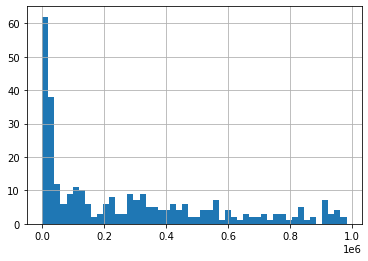

In [30]:
for_hist = data_sorted_day_count_drop[data_sorted_day_count['day_square']< 1000000]
for_hist['day_square'].hist(bins=50)

Объединим ночной и дневной датасет.

In [31]:
merge_data = data_sorted_night_count_drop.merge(data_sorted_day_count_drop, on='id', how='inner')
merge_data

,longitude_mean,latitude_mean,night_square,longitude_mean_day,latitude_mean_day,day_square
id,,,,,,
2,38.938396,47.209695,"307,233.076694",38.937699,47.209291,"726,505.505221"
3,45.656193,43.259608,"35,725.504293",45.672075,43.321897,"84,608,516.524841"
4,47.122996,42.813180,"3,294,792.893532",47.122253,42.812378,"3,020,718.164241"
5,158.603659,53.069024,"1,408,526.542043",158.605267,53.056002,0.000000
6,104.256066,52.252100,"13,971,519.031692",104.255970,52.252395,"2,511,335.124954"
...,...,...,...,...,...,...
954,104.084433,52.417183,"309,059,358.674445",103.873326,52.573463,"1,319,542,314.749705"
956,37.717083,55.822434,"7,339.541215",37.528305,55.755539,"172,247,602.675976"
957,37.904358,55.584916,88.348998,37.655879,55.669645,"399,680.497216"


Рассчитаем дистанцию от дома до работы у каждого пользователя, она примерно будет равна расстоянию между центроидами райнов передвижения в ночное и дневное время.

In [32]:
def distanse_home_to_work(row):
    origin = (row['latitude_mean'], row['longitude_mean'])
    dist = (row['latitude_mean_day'], row['longitude_mean_day'])
    return geodesic(origin, dist).meters

In [33]:
merge_data['distanse_home_work'] = merge_data.apply(distanse_home_to_work, axis=1)
merge_data

,longitude_mean,latitude_mean,night_square,longitude_mean_day,latitude_mean_day,day_square,distanse_home_work
id,,,,,,,
2,38.938396,47.209695,"307,233.076694",38.937699,47.209291,"726,505.505221",69.325221
3,45.656193,43.259608,"35,725.504293",45.672075,43.321897,"84,608,516.524841","7,039.182037"
4,47.122996,42.813180,"3,294,792.893532",47.122253,42.812378,"3,020,718.164241",107.798809
5,158.603659,53.069024,"1,408,526.542043",158.605267,53.056002,0.000000,"1,453.269309"
6,104.256066,52.252100,"13,971,519.031692",104.255970,52.252395,"2,511,335.124954",33.408659
...,...,...,...,...,...,...,...
954,104.084433,52.417183,"309,059,358.674445",103.873326,52.573463,"1,319,542,314.749705","22,538.779774"
956,37.717083,55.822434,"7,339.541215",37.528305,55.755539,"172,247,602.675976","13,989.866010"
957,37.904358,55.584916,88.348998,37.655879,55.669645,"399,680.497216","18,275.076622"


Убираем признаки которые нам не пригодятся.

In [34]:
merge_data = merge_data[['night_square', 'day_square', 'distanse_home_work']]
merge_data

,night_square,day_square,distanse_home_work
id,,,
2,"307,233.076694","726,505.505221",69.325221
3,"35,725.504293","84,608,516.524841","7,039.182037"
4,"3,294,792.893532","3,020,718.164241",107.798809
5,"1,408,526.542043",0.000000,"1,453.269309"
6,"13,971,519.031692","2,511,335.124954",33.408659
...,...,...,...
954,"309,059,358.674445","1,319,542,314.749705","22,538.779774"
956,"7,339.541215","172,247,602.675976","13,989.866010"
957,88.348998,"399,680.497216","18,275.076622"


### Применяем критерий

Можно предположить, что, если пользователь дома, координаты его передвижений не выйдут за пределы квадрата с примерными сторонами 500 м. и ориентировочной площадью 250 000 кв. м. Для офиса эту площадь можно увеличить в несколько раз, например, 1 000 000 кв. м.

Минимальную дистанцию от дома до работы возьмем более 2000 м.


In [35]:

# Сюда вписываем максимальный размер площади "домашнего" района
max_night_square = 250000 

# Здесь указываем максимальный размер площади "рабочего" района
max_day_square = 1000000

# Здесь минимальная дистанция после которой мы можем отделить "домашний" район от "рабочего"
min_distanse_home_to_work = 2000


known_home_and_work = merge_data[(merge_data.night_square < max_night_square)]
known_home_and_work = known_home_and_work[(known_home_and_work.distanse_home_work > min_distanse_home_to_work)]
known_home_and_work = known_home_and_work[(known_home_and_work.day_square < max_day_square)]


print('ID пользователей, которые достаточно долгое время в ночные часы находится в районе одной точки “дом” и достаточно долгое время в дневные часы находится в заметно отличающейся точке “работа”:', str(list(known_home_and_work.index))[1:-1])
print()
print('Количество пользователей = ', known_home_and_work.shape[0]) 


ID пользователей, которые достаточно долгое время в ночные часы находится в районе одной точки “дом” и достаточно долгое время в дневные часы находится в заметно отличающейся точке “работа”: 59, 89, 103, 136, 152, 153, 154, 175, 179, 183, 277, 282, 306, 309, 329, 347, 446, 468, 471, 487, 549, 657, 673, 727, 752, 792, 867, 886, 940, 957

Количество пользователей =  30


### Вывод

При наличии информации от технических специалистов о погрешности в фиксации текущих координат пользователя можно лучше распознать «домашний» и «рабочий» районы и, следовательно, точнее определить заданных условием пользователей.

#### Что можно сделать еще

Попробовать определить принадлежность района к «дому» и «работе» по сумме расстояний всех перемещений пользователя за определенный период времени.